save evoked ave

In [1]:
# https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
import mne
# sample_data_raw_file='C:/Users/zhouz\Downloads/CC110033/rest/rest_raw.fif'
# sample_data_raw_file='C:/Users/zhouz\Downloads/CC110033/task/task_raw.fif'
sample_data_raw_file="../../CAMCAN_MEG_100/CC110033/task/task_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmin=30,tmax=60).load_data()

Opening raw data file ../../CAMCAN_MEG_100/CC110033/task/task_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 16000 ... 557999 =     16.000 ...   557.999 secs
Ready.
Reading 0 ... 30000  =      0.000 ...    30.000 secs...


<Raw | task_raw.fif, 339 x 30001 (30.0 s), ~84.0 MB, data loaded>

In [2]:
raw.plot()

Using qt as 2D backend.


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


Effective window size : 0.256 (s)


/home/zhibinz2/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


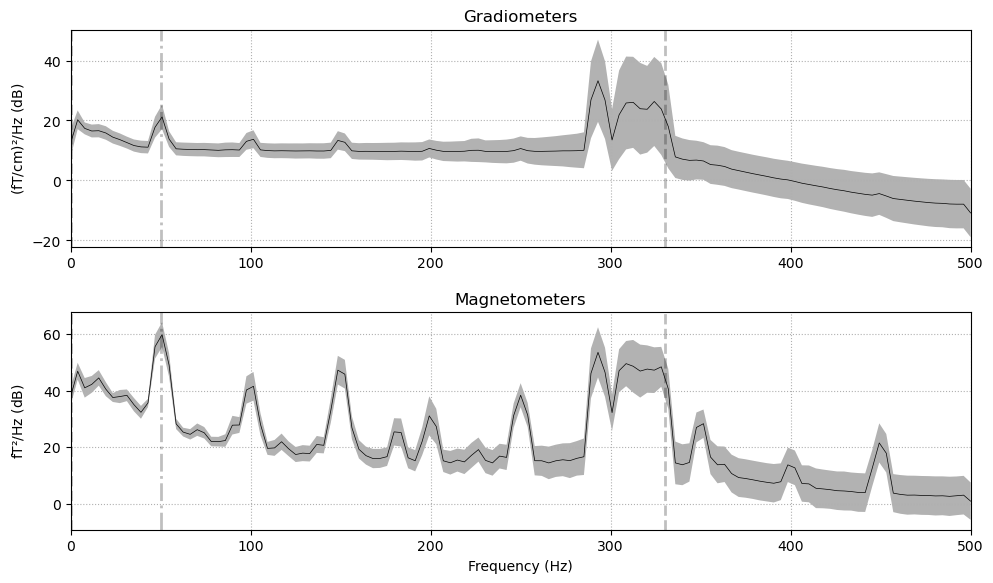

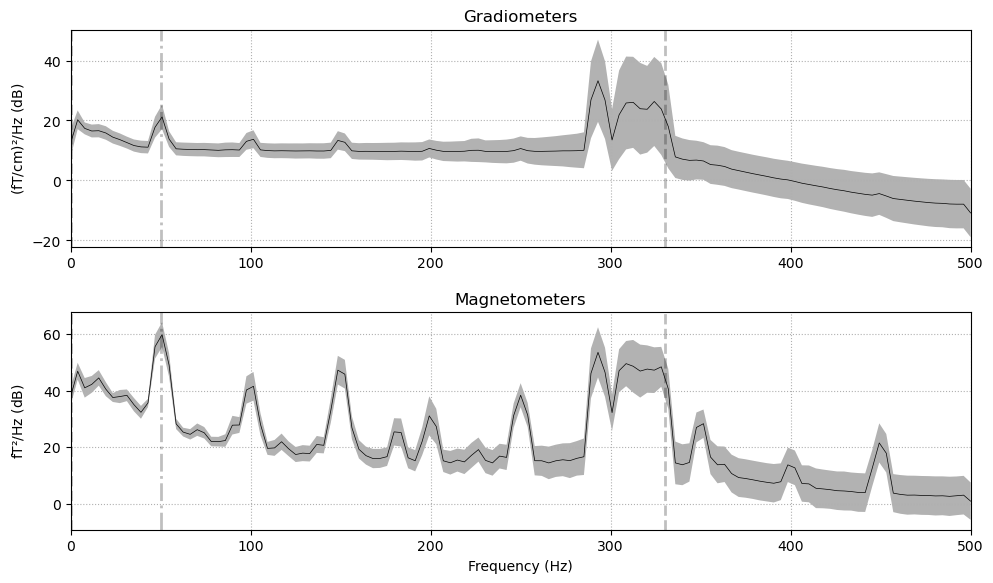

In [3]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

In [4]:
events = mne.find_events(raw, stim_channel="STI001")
events

5 events found
Event IDs: [5]


array([[56720,     0,     5],
       [58820,     0,     5],
       [60654,     0,     5],
       [62722,     0,     5],
       [64656,     0,     5]])

In [5]:
event_dict = {"auditory/left": 5}
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict, preload=True)
evoked = epochs["auditory/left"].average()

Not setting metadata
5 matching events found
Setting baseline interval to [-0.3, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 8)
8 projection items activated
Using data from preloaded Raw for 5 events and 1001 original time points ...
0 bad epochs dropped


In [6]:
mne.write_evokeds('evoked-ave.fif', evoked, on_mismatch='raise', overwrite=True, verbose=None)

Overwriting existing file.


save noise cov

In [7]:
# https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
import mne
# sample_data_raw_file='C:/Users/zhouz\Downloads/CC110033/rest/rest_raw.fif'
# sample_data_raw_file='C:/Users/zhouz\Downloads/CC110033/task/task_raw.fif'
sample_data_raw_file="../../CAMCAN_MEG_100/CC110033/task/task_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmin=0,tmax=30).load_data()

Opening raw data file ../../CAMCAN_MEG_100/CC110033/task/task_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 16000 ... 557999 =     16.000 ...   557.999 secs
Ready.
Reading 0 ... 30000  =      0.000 ...    30.000 secs...


<Raw | task_raw.fif, 339 x 30001 (30.0 s), ~84.0 MB, data loaded>

In [8]:
raw_empty_room=raw

In [9]:
raw_empty_room.info["bads"]

[]

In [10]:
raw_empty_room.info["bads"] = [bb for bb in raw.info["bads"] if "EEG" not in bb]

In [11]:
raw.info["projs"]

[<Projection | mag_ssp_upright.fif : PCA-mags-v1, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v2, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v3, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v4, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v5, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v1, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v2, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v3, active : False, n_channels : 306>]

In [12]:
raw_empty_room.info["projs"]

[<Projection | mag_ssp_upright.fif : PCA-mags-v1, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v2, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v3, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v4, active : False, n_channels : 306>,
 <Projection | mag_ssp_upright.fif : PCA-mags-v5, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v1, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v2, active : False, n_channels : 306>,
 <Projection | grad_ssp_upright.fif : PCA-grad-v3, active : False, n_channels : 306>]

In [13]:
raw_empty_room.add_proj([pp.copy() for pp in raw.info["projs"] if "EEG" not in pp["desc"]])

8 projection items deactivated


<Raw | task_raw.fif, 339 x 30001 (30.0 s), ~84.0 MB, data loaded>

In [14]:
noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=0, tmax=None)

Using up to 150 segments
Number of samples used : 30000
[done]


In [15]:
noise_cov_baseline = mne.compute_covariance(epochs, tmax=0)

Computing rank from data with rank=None
    Using tolerance 5.5e-07 (2.2e-16 eps * 306 dim * 8.2e+06  max singular value)
    Estimated rank (mag + grad): 298
    MEG: rank 298 computed from 306 data channels with 8 projectors
    Created an SSP operator (subspace dimension = 8)


/tmp/ipykernel_97010/948023615.py:1: RuntimeWarning: Too few samples (required : 1535 got : 1505), covariance estimate may be unreliable
  noise_cov_baseline = mne.compute_covariance(epochs, tmax=0)


    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 306 -> 298
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 1505
[done]


    Created an SSP operator (subspace dimension = 8)
Computing rank from covariance with rank=None
    Using tolerance 2.5e-10 (2.2e-16 eps * 102 dim * 1.1e+04  max singular value)
    Estimated rank (mag): 97
    MAG: rank 97 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 4.1e-09 (2.2e-16 eps * 204 dim * 9e+04  max singular value)
    Estimated rank (grad): 201
    GRAD: rank 201 computed from 204 data channels with 0 projectors


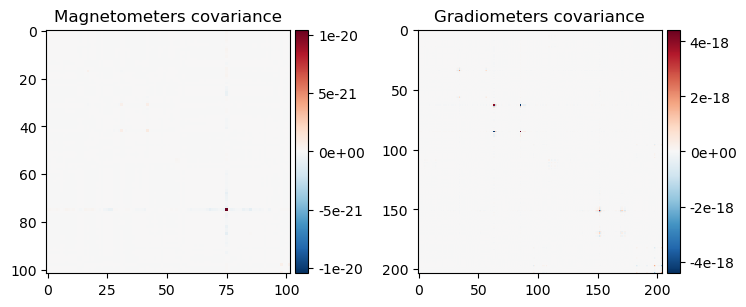

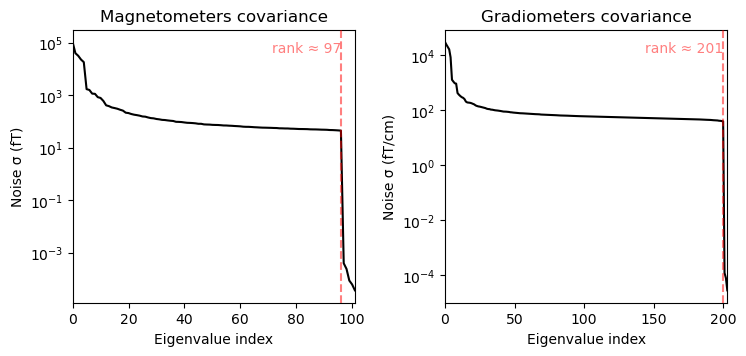

(<Figure size 760x370 with 4 Axes>, <Figure size 760x370 with 2 Axes>)

In [16]:
noise_cov.plot(raw_empty_room.info, proj=True)

    Created an SSP operator (subspace dimension = 8)
Computing rank from covariance with rank=None
    Using tolerance 9.5e-10 (2.2e-16 eps * 102 dim * 4.2e+04  max singular value)
    Estimated rank (mag): 97
    MAG: rank 97 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 1.5e-08 (2.2e-16 eps * 204 dim * 3.3e+05  max singular value)
    Estimated rank (grad): 201
    GRAD: rank 201 computed from 204 data channels with 0 projectors


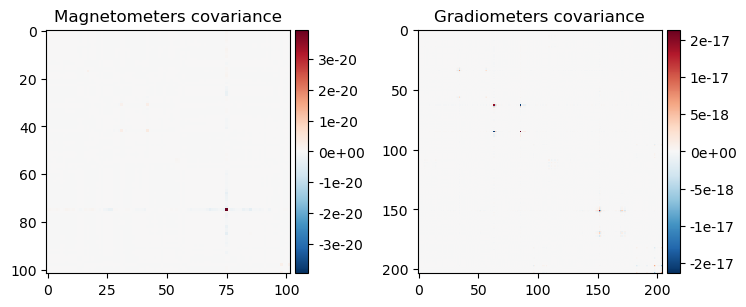

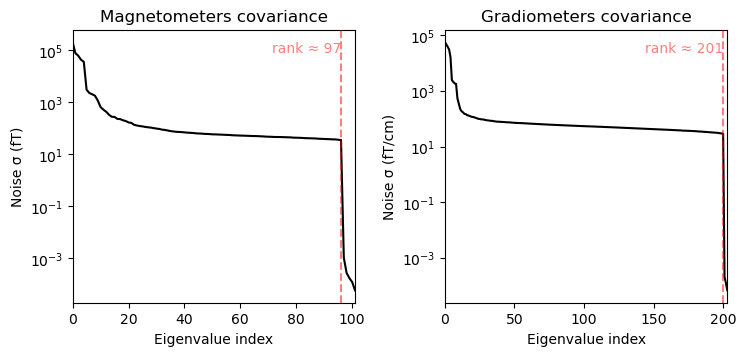

(<Figure size 760x370 with 4 Axes>, <Figure size 760x370 with 2 Axes>)

In [17]:
noise_cov_baseline.plot(epochs.info, proj=True)

In [19]:
mne.write_cov('CAMCAN-cov.fif', noise_cov, overwrite=True, verbose=None)

Overwriting existing file.
